# Post-process spectra

Post-processing methods to :

- generate Spectrum objects from text files or python arrays.
- rescale a spectrum without redoing the line-by-line calculation.
- apply instrumental slit functions.
- plot with one line and in whatever unit.
- crop, offset or interpolate.
- remove baselines.
- multiply or add constants as simply as with s=10*s or s=s+0.2 in Python.
- store an experimental or a calculated spectrum while retaining the metadata.
- compare different spectra.
- combine multiple spectra along the line-of-sight.
- manipulate a folder of spectra easily with spectrum Databases.
- compute transmittance from absorbance, or whatever missing spectral quantity.
- use the line survey tool to identify each line.

Get to know more on the [Spectrum object](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html) page of the online documentation. 

# Get started : 

We will use the CO example from the [~/welcome.ipynb](../welcome.ipynb) script.  

HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


/srv/conda/envs/notebook/lib/python3.6/site-packages/radis/misc/warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


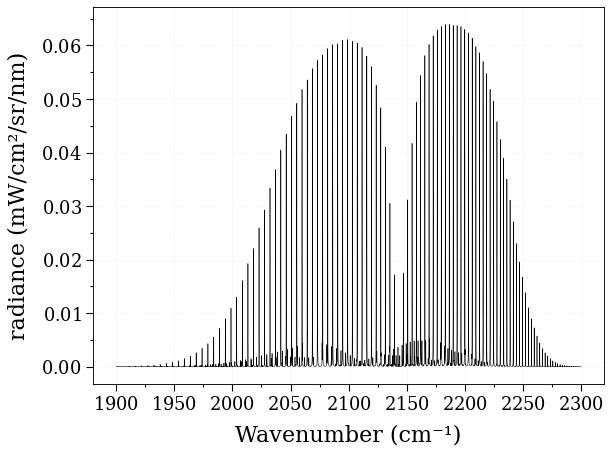

In [1]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on File>Export Notebook.
%matplotlib inline

from radis import calc_spectrum
s = calc_spectrum(1900, 2300,         # cm-1
                  molecule='CO',
                  isotope='1,2,3',
                  pressure=1.01325,   # bar
                  Tgas=700,           # K
                  mole_fraction=0.1,
                  path_length=1,      # cm
                  verbose=False,
                  )
s.plot()    # plot the radiance by default 

Now we can do some basic post-processing functions. Below we will apply an instrumental slit function, plot changing units, store on disk and show all lines with the line survey. Have a look at the [Spectrum object](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html#the-spectrum-object) in the online documentation for other uses.  

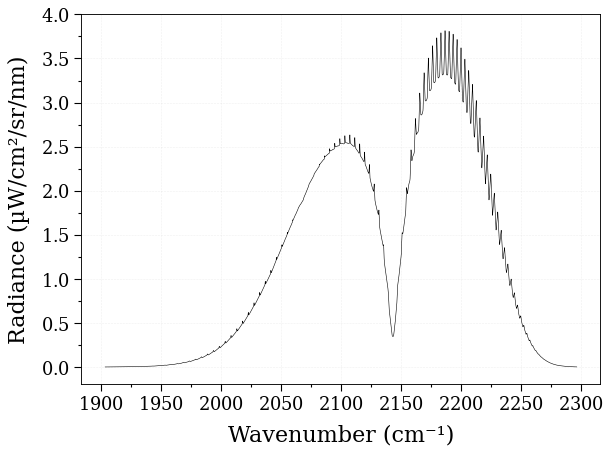

In [2]:
s.apply_slit(10, 'nm')       # simulate a (very large) instrumental slit function
s.plot(Iunit='µW/cm2/sr/nm', nfig='same')

We could also plot other spectral quantities, such as the transmittance or the opacity (absorption coefficient). See an example below :

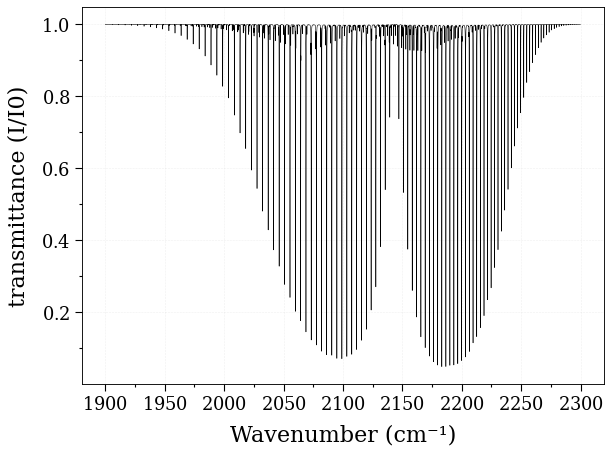

In [3]:
s.plot('transmittance_noslit')       # change to "abscoeff" for opacity

Let's [save](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html#save-a-spectrum-object) the Spectrum for future use. We use `store` which saves all information about the spectrum, including emission & absorption, input parameters, the line database used, and the units. Do not make ever make any unit conversion error : just work with `.spec` files and let RADIS handle the conversions ! If really needed, you can also export some of the spectral quantites as text with `savetxt`.

In [4]:
s.store("welcome.spec", compress=True)      # store the Spectrum object on disk with all the quantities (emission, absorption) and metadata (units, etc.)  
s.savetxt("welcome_radiance.spec", "radiance_noslit", wunit="nm", Iunit="µW/cm2/sr/nm")

/srv/conda/envs/notebook/lib/python3.6/site-packages/json_tricks/encoders.py:367: UserWarning: json-tricks: numpy scalar serialization is experimental and may work differently in future versions
  warnings.warn('json-tricks: numpy scalar serialization is experimental and may work differently in future versions')


Spectrum stored in welcome.spec (2.7Mb)


We can reload it afterwards with `load_spec`. The same can be used to load experimental spectra saved with their units or other information such as acquisition conditions in the  .condition dictionary. See [how to generate a Spectrum](https://radis.readthedocs.io/en/latest/spectrum/spectrum.html#how-to-generate-a-spectrum) from text files or Python arrays.

In [5]:
from radis import load_spec  # for future loading. Click on the function to get help in the Contextual Help Window. 
load_spec("welcome.spec")    # retrieves all information. 

### Line Survey

Finally, we will use the Line survey module to more information about the spectral lines found in the spectra. This information is stored in the Spectrum object, and on the disk when stored, unless `compress=2` was chosen. 

Below, we will show all lines detail under the corresponding radiance spectrum. For this example with add a smaller slit, and chain the commands, i.e. we combine : `s.apply_slit()` with `s.line_survey()` 

Zoom over the plot and get all the information about each line ! 

In [6]:
s.apply_slit(5, "nm").line_survey(overlay='radiance', barwidth=0.5)


749 lines
